In [71]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
from tensorflow.keras import Sequential

In [72]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

# LSTM
The basic form of a neural network has a problem of the vanishing/exploding gradient.
when the weight on the feedback loop is greater than one and we had 50 days of sequential data, we would raise the weight to the power of 50 which would cause the gradient to explode. if the weight was smaller than 0 the gradient would vanish

In order to solve the vanishing/exploding gradient problem LSTM uses 2 seperate paths to make predictions, one for long-term memory and another for short-term.

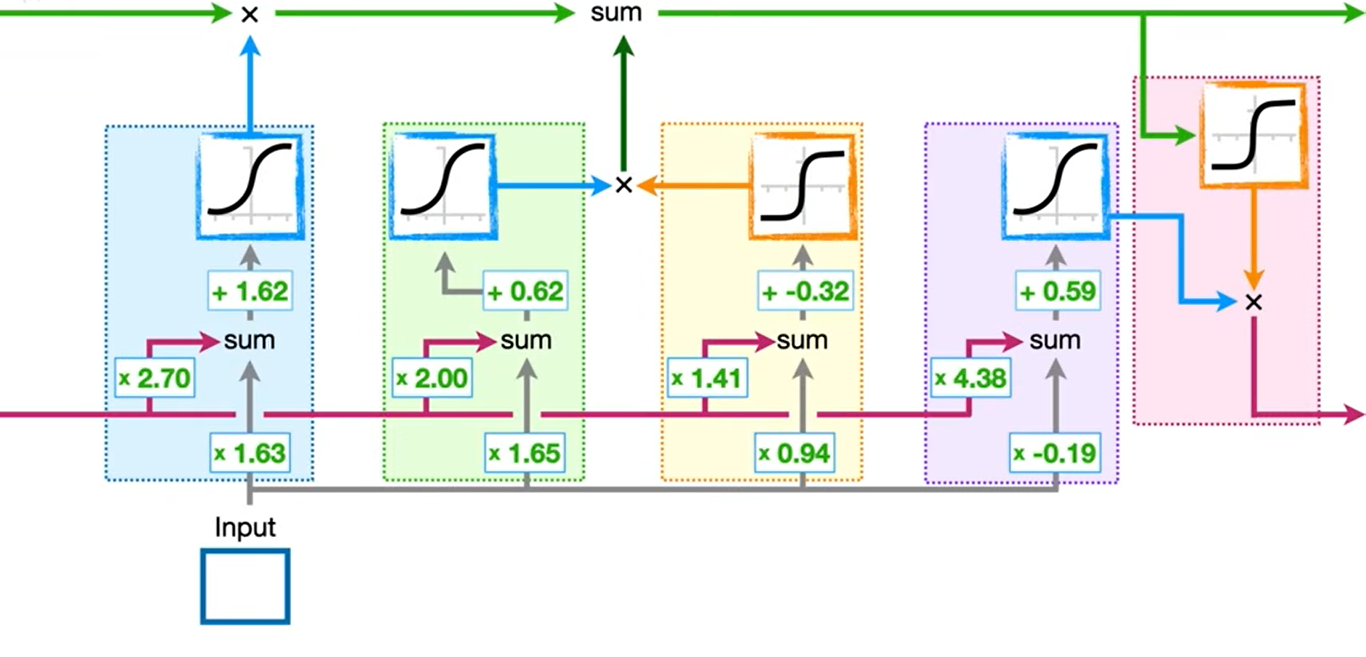
The long green line on the top represents the long-term memory which can be modified by the multiplication of the forget gate and the addition of the input gate.

The forget gate: it is the first block in the above diagram;
output1= sigmoid(input * a weight + the short-term memory * a weight + bias). it is the percentage to multiply the long-term memory with.

The input gate: it is the 2 blocks in the center of the diagram, the third block (in orange) represents the potential long-term memory, the second block (in green) similar to the forget gate is the percent to remember multiplied with the potential long-term memory; 
output2= tanh(input * a weight + the short-term memory * a weight)* sigmoid(input * a weight + the short-term memory * a weight + bias) + output1.

The short term memory is updated by the third gate; the new short-term memory = (tanh( output2) * sigmoid(input * a weight + the short-term memory + bias)


# GRU
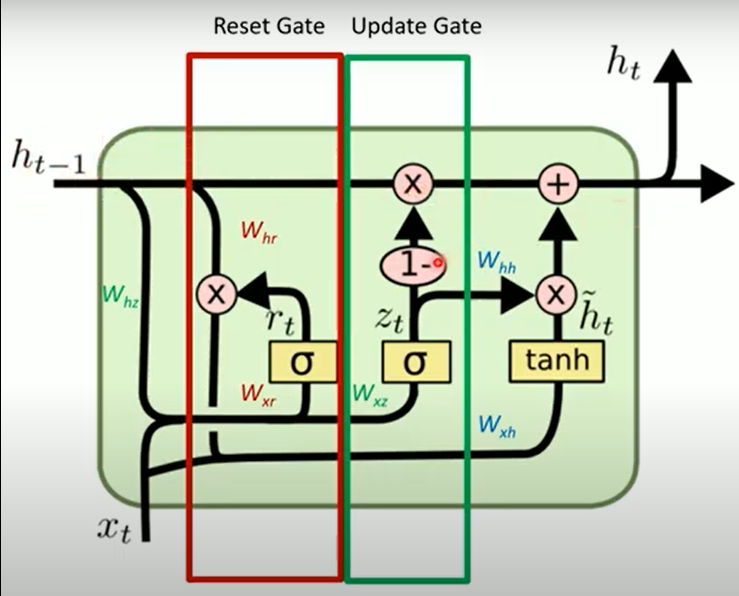
Similar to an LSTM the gated recurrent unit has a long and short term memory but the way they are updated are a little different. The GRU is made up of 2 gates the rest and the update.

Reset gate: decides how much info is kept from the previous timesteps (it is like a logistic regression) R(t)= sigmoid( input x(t) * a weight + short-term memory h(t-1) * weight + bias)

Update State: decides how much info to keep from the current and previous timesteps, it also looks like a logistic regression Z(t)=sigmoid( input x(t) * a weight + short-term memory h(t-1) * weight + bias)

[each gate has different sets of weights]

Candidate hidden state: long-term update = tanh (weight * input + (weight * R(t)* h(t-1)+ bias)

short-term update = (1 - Z(t))* h(t-1) + Z(t) * long-term update
# Summary
* GRUs have less tensor operations therefore are speedier to train than LSTMs, however LSTMs are more accurate when using datasets with longer sequences.
* RNNs are good for processing sequence data for predictions but suffer from short-term memory.
* GRUs and LSTMs use gates to control the flow of information being passed from one timestep to the next.

# CNN vs LSTM
a CNN captures information about the neighboring data which makes it a good candidate for image clssification. Time series values also depend on their neighbors so CNNs can yield promising results.
However if we want to benefit from long memory across the sequence and also keep only what is relevant in that sequence than LSTM is required.

In [73]:
df = pd.read_csv(csv_path)


In [74]:
df = df[5::6]
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [75]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [76]:
temp=df['Tdew (degC)']
temp_df = pd.DataFrame({'Temperature':temp})


In [77]:
temp_df = pd.DataFrame({'Temperature':temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Temperature,Seconds
Date Time,,
2009-01-01 01:00:00,-8.78,1.230772e+09
2009-01-01 02:00:00,-9.77,1.230775e+09
2009-01-01 03:00:00,-9.66,1.230779e+09
2009-01-01 04:00:00,-10.02,1.230782e+09
2009-01-01 05:00:00,-10.65,1.230786e+09
...,...,...
2016-12-31 19:10:00,-5.36,1.483211e+09
2016-12-31 20:10:00,-6.84,1.483215e+09
2016-12-31 21:10:00,-6.90,1.483219e+09


# Predicting the Temperature 

After extracting the seconds from the date, I divided it respectively by the nb of seconds in a day and then nb of seconds in a year to get the year and day.

Because the temperature data is seasonal we want the neural network to correlate the jan 1 values with december 31 st as well as jan 1st of other years for example, so applying sin and cos transformation gives these dates similar values

In [78]:
day = 60*60*24
year = 365.2425*day

temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2* np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))
temp_df.head()

,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,-8.78,1.230772e+09,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-9.77,1.230775e+09,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-9.66,1.230779e+09,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-10.02,1.230782e+09,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-10.65,1.230786e+09,0.965926,0.258819,0.012916,0.999917


In [79]:
temp_df = temp_df.drop('Seconds', axis=1)
temp_df.head()

,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 01:00:00,-8.78,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-9.77,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-9.66,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-10.02,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-10.65,0.965926,0.258819,0.012916,0.999917


In [80]:
def df_to_X_y2(df, window_size=6, forecast_size=3):
    df_as_np = df.to_numpy()
    X = []# initializing the list of input values
    y = []# initializing the list of output values
    row=[]
    label=[]
    for i in range(len(df_as_np)-window_size-forecast_size):
        row = [r for r in df_as_np[i:i+window_size]] #storing sequences of 6 timesteps into X
        X.append(row)
        label = [o for o in df_as_np[i+window_size:i+window_size+forecast_size,0]]#storing the 7, 8, and 9th value in y
        y.append(label)
    return np.array(X), np.array(y)#converting X & y into numpy array

In [81]:
X2, y2 = df_to_X_y2(temp_df)
X2.shape, y2.shape
#X2.shape= (nb examples, window size, nb of features)
#y2.shpae=(nb examples, nb of forecasts)

((70082, 6, 5), (70082, 3))

In [82]:
X2_train, y2_train = X2[:60000], y2[:60000]
X2_val, y2_val = X2[60000:65000], y2[60000:65000]
X2_test, y2_test = X2[65000:], y2[65000:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((60000, 6, 5), (60000, 3), (5000, 6, 5), (5000, 3), (5082, 6, 5), (5082, 3))

In [83]:
temp_training_mean = np.mean(X2_train[:, :, 0])# storing the mean of the temp column
temp_training_std = np.std(X2_train[:, :, 0])#storing the standard deviation of the temp column
                           
def preprocess(X):
    X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
    return X

In [84]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[ 1.21876174e+00, -9.65925826e-01,  2.58819045e-01,
          5.22877889e-01, -8.52407598e-01],
        [ 1.20559047e+00, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 1.18510184e+00, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 1.17339406e+00, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 1.16461321e+00, -2.58819045e-01,  9.65925826e-01,
          5.20431780e-01, -8.53903251e-01],
        [ 1.14558806e+00, -7.16474371e-12,  1.00000000e+00,
          5.19819584e-01, -8.54276068e-01]],

       [[ 1.20559047e+00, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 1.18510184e+00, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 1.17339406e+00, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 1.16461321e+00, -2.58819045e-01,  9.65925826e-01,
  

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((6, 5)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(3, 'linear'))

model1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 64)                17920     
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 27        
Total params: 18,467
Trainable params: 18,467
Non-trainable params: 0
_________________________________________________________________


In [86]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)#saving only the best validation loss
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [87]:
model1.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp1])

Epoch 1/10
1875/1875 [==============================] - 12s 5ms/step - loss: 20.8190 - root_mean_squared_error: 4.5628 - val_loss: 2.3729 - val_root_mean_squared_error: 1.5404
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.7135 - root_mean_squared_error: 1.6473 - val_loss: 1.7407 - val_root_mean_squared_error: 1.3194
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.7511 - root_mean_squared_error: 1.3233 - val_loss: 1.4163 - val_root_mean_squared_error: 1.1901
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.3926 - root_mean_squared_error: 1.1801 - val_loss: 1.1037 - val_root_mean_squared_error: 1.0506
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.1953 - root_mean_squared_error: 1.0933 - val_loss: 0.9716 - val_root_mean_squared_error: 0.9857
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.0870 - root_mean_squared_error: 1.0426 - val_l

# Visualizing predictions on the test set

The model we used predicts values for three timesteps, which are flattened into one vector, so to get all the next hour we would start at 0 with a step of 3

In [88]:
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
def plot_predictions1(model, X, y, start=0, end=100,forecast=0):
    predictions = model.predict(X).flatten()
    actuals = y.flatten()
    df = pd.DataFrame(data={'Predictions':predictions[forecast::3], 'Actuals':actuals[forecast::3]})
    plt.plot(df['Predictions'][start:end],label="Predictions")
    plt.plot(df['Actuals'][start:end],label="Actuals")
    plt.legend(loc="upper left")
    return df, mse(actuals[forecast::3], predictions[forecast::3])


(      Predictions  Actuals
 0       12.404648    12.55
 1       12.199265    12.15
 2       11.785177    11.59
 3       11.263919    11.65
 4       11.598194    10.98
 ...           ...      ...
 5077    -3.028076    -4.39
 5078    -4.735044    -4.63
 5079    -5.094119    -4.92
 5080    -5.276512    -5.36
 5081    -5.678203    -6.84
 
 [5082 rows x 2 columns],
 0.2972034469260071)

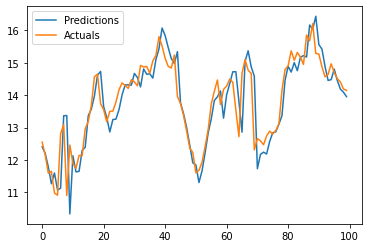

In [89]:
plot_predictions1(model4, X2_test, y2_test,forecast=0)

Prediction 3 hours ahead of the last value in the sequence:

(      Predictions  Actuals
 0       12.232187    11.59
 1       12.141379    11.65
 2       11.847792    10.98
 3       11.448195    10.91
 4       11.690035    12.81
 ...           ...      ...
 5077    -2.599617    -4.92
 5078    -4.080663    -5.36
 5079    -4.766901    -6.84
 5080    -5.159894    -6.90
 5081    -5.586884    -7.15
 
 [5082 rows x 2 columns],
 1.0631605060777878)

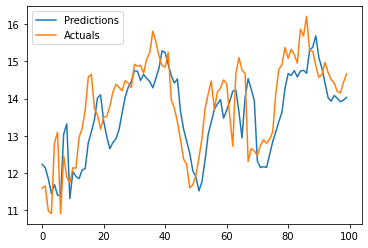

In [90]:
plot_predictions1(model1, X2_test, y2_test,forecast=2)

# Adding Pressure(mbar)
(And predicting both pressure and temperature)

In [91]:
p_temp_df = pd.concat([df['p (mbar)'], temp_df], axis=1)
p_temp_df.head()

,p (mbar),Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,996.50,-8.78,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,996.62,-9.77,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,996.84,-9.66,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,996.99,-10.02,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,997.46,-10.65,0.965926,0.258819,0.012916,0.999917


In [92]:
def df_to_X_y3(df, window_size=7):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]]
        y.append(label)
    return np.array(X), np.array(y)

In [93]:
X3, y3 = df_to_X_y3(p_temp_df)
X3.shape, y3.shape
#X3.shape (nb examples , nb of timesteps, nb of features)
#y3.shape (nb examples , nb of features)

((70084, 7, 6), (70084, 2))

In [94]:
X3_train, y3_train = X3[:60000], y3[:60000]
X3_val, y3_val = X3[60000:65000], y3[60000:65000]
X3_test, y3_test = X3[65000:], y3[65000:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((60000, 7, 6), (60000, 2), (5000, 7, 6), (5000, 2), (5084, 7, 6), (5084, 2))

In [95]:
p_training_mean3 = np.mean(X3_train[:, :, 0])
p_training_std3 = np.std(X3_train[:, :, 0])

temp_training_mean3 = np.mean(X3_train[:, :, 1])
temp_training_std3 = np.std(X3_train[:, :, 1])

def preprocess3(X):
    X[:, :, 0] = (X[:, :, 0] - p_training_mean3) / p_training_std3
    X[:, :, 1] = (X[:, :, 1] - temp_training_mean3) / temp_training_std3

def preprocess_output3(y):
    y[:, 0] = (y[:, 0] - p_training_mean3) / p_training_std3
    y[:, 1] = (y[:, 1] - temp_training_mean3) / temp_training_std3
    return y

In [96]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

In [97]:
preprocess_output3(y3_train)
preprocess_output3(y3_val)
preprocess_output3(y3_test)

array([[-0.7934386 ,  1.06070744],
       [-0.76312281,  0.97875128],
       [-0.72189335,  0.9875323 ],
       ...,
       [ 1.48145784, -1.7272656 ],
       [ 1.41597574, -1.76385317],
       [ 1.35049365, -1.90142245]])

In [98]:
model2 = Sequential()
model2.add(InputLayer((7, 6)))
model2.add(LSTM(64))
model2.add(Dense(8, 'relu'))
model2.add(Dense(2, 'linear'))

model2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 64)                18176     
_________________________________________________________________
dense_18 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 18        
Total params: 18,714
Trainable params: 18,714
Non-trainable params: 0
_________________________________________________________________


In [99]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [100]:
model2.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp2])

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1053 - root_mean_squared_error: 0.3246 - val_loss: 0.0282 - val_root_mean_squared_error: 0.1678
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0224 - root_mean_squared_error: 0.1497 - val_loss: 0.0178 - val_root_mean_squared_error: 0.1333
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0133 - root_mean_squared_error: 0.1155 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0954
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0083 - root_mean_squared_error: 0.0914 - val_loss: 0.0061 - val_root_mean_squared_error: 0.0778
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0068 - root_mean_squared_error: 0.0824 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0721
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0061 - root_mean_squared_error: 0.0778 - val_l

In [101]:
def postprocess_temp(arr):
    arr = (arr*temp_training_std3) + temp_training_mean3
    return arr

def postprocess_p(arr):
    arr = (arr*p_training_std3) + p_training_mean3
    return arr

In [102]:
def plot_predictions2(model, X, y, start=0, end=100):
    predictions = model.predict(X)
    p_preds, temp_preds = postprocess_p(predictions[:, 0]), postprocess_temp(predictions[:, 1])
    p_actuals, temp_actuals = postprocess_p(y[:, 0]), postprocess_temp(y[:, 1])
    df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
    return df,mse(p_actuals, p_preds),mse(temp_actuals, temp_preds)

In [103]:
post_processed_df,mse_p,mse_temp = plot_predictions2(model2, X3_test, y3_test)
post_processed_df,mse_p,mse_temp

(      Temperature Predictions  Temperature Actuals  Pressure Predictions  \
 0                   12.383041                12.15            982.497070   
 1                   12.045115                11.59            982.592407   
 2                   11.496485                11.65            982.875610   
 3                   11.673544                10.98            983.261230   
 4                   11.021200                10.91            983.948303   
 ...                       ...                  ...                   ...   
 5079                -5.169841                -5.36           1002.414856   
 5080                -5.599118                -6.84           1002.326477   
 5081                -7.264627                -6.90           1001.484314   
 5082                -7.088528                -7.15           1000.926941   
 5083                -7.293686                -8.09           1000.319580   
 
       Pressure Actuals  
 0               982.43  
 1               982.6

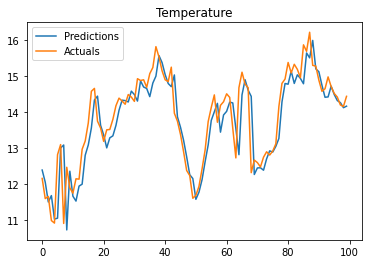

In [104]:
start, end = 0, 100
plt.plot(post_processed_df['Temperature Predictions'][start:end],label="Predictions")
plt.plot(post_processed_df['Temperature Actuals'][start:end],label="Actuals")
plt.title('Temperature')
plt.legend(loc="upper left")

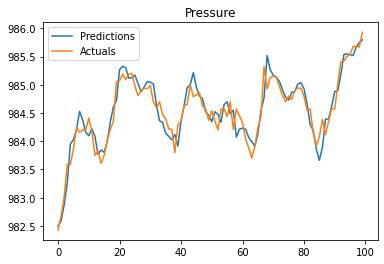

In [105]:
plt.plot(post_processed_df['Pressure Predictions'][start:end],label="Predictions")
plt.plot(post_processed_df['Pressure Actuals'][start:end],label="Actuals")
plt.title('Pressure')
plt.legend(loc="upper left")

In [106]:
model3 = Sequential()
model3.add(InputLayer((7, 6)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(2, 'linear'))

model3.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_3 (GRU)                  (None, 64)                13824     
_________________________________________________________________
dense_20 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 18        
Total params: 14,362
Trainable params: 14,362
Non-trainable params: 0
_________________________________________________________________


In [107]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [108]:
model3.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp3])

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1167 - root_mean_squared_error: 0.3417 - val_loss: 0.0199 - val_root_mean_squared_error: 0.1411
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0150 - root_mean_squared_error: 0.1226 - val_loss: 0.0099 - val_root_mean_squared_error: 0.0995
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0086 - root_mean_squared_error: 0.0930 - val_loss: 0.0057 - val_root_mean_squared_error: 0.0754
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0064 - root_mean_squared_error: 0.0800 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0687
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0057 - root_mean_squared_error: 0.0758 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0660
Epoch 6/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0054 - root_mean_squared_error: 0.0737 - val_l

In [109]:
post_processed_df,mse_p,mse_temp = plot_predictions2(model3, X3_test, y3_test)
post_processed_df,mse_p,mse_temp
#GRU did had a slighly lower mse for the pressure variable according to the mse, but a little worse for temperature

(      Temperature Predictions  Temperature Actuals  Pressure Predictions  \
 0                   12.261482                12.15            982.504822   
 1                   11.883032                11.59            982.611511   
 2                   11.353338                11.65            982.856873   
 3                   11.518167                10.98            983.259644   
 4                   10.845455                10.91            983.906982   
 ...                       ...                  ...                   ...   
 5079                -5.072060                -5.36           1002.387878   
 5080                -5.577314                -6.84           1002.258545   
 5081                -7.292679                -6.90           1001.393616   
 5082                -7.227532                -7.15           1000.786377   
 5083                -7.415678                -8.09           1000.156799   
 
       Pressure Actuals  
 0               982.43  
 1               982.6

In [110]:
model4 = Sequential()
model4.add(InputLayer((7, 6)))
model4.add(LSTM(32, return_sequences=True))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(2, 'linear'))

model4.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 7, 32)             4992      
_________________________________________________________________
lstm_7 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 18        
Total params: 30,362
Trainable params: 30,362
Non-trainable params: 0
_________________________________________________________________


In [111]:
cp4 = ModelCheckpoint('model6/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [112]:
model4.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp4])

Epoch 1/10
1875/1875 [==============================] - 25s 12ms/step - loss: 0.1389 - root_mean_squared_error: 0.3727 - val_loss: 0.0385 - val_root_mean_squared_error: 0.1963
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0311 - root_mean_squared_error: 0.1763 - val_loss: 0.0254 - val_root_mean_squared_error: 0.1595
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0173 - root_mean_squared_error: 0.1316 - val_loss: 0.0120 - val_root_mean_squared_error: 0.1093
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0105 - root_mean_squared_error: 0.1023 - val_loss: 0.0082 - val_root_mean_squared_error: 0.0903
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0087 - root_mean_squared_error: 0.0931 - val_loss: 0.0067 - val_root_mean_squared_error: 0.0816
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0076 - root_mean_squared_error: 0.0873 -

In [113]:
post_processed_df,mse_p,mse_temp = plot_predictions2(model4, X3_test, y3_test)
post_processed_df,mse_p,mse_temp

(      Temperature Predictions  Temperature Actuals  Pressure Predictions  \
 0                   12.217741                12.15            982.596924   
 1                   11.844713                11.59            982.735840   
 2                   11.325788                11.65            982.979309   
 3                   11.492594                10.98            983.362122   
 4                   10.880922                10.91            983.977539   
 ...                       ...                  ...                   ...   
 5079                -5.423337                -5.36           1002.092407   
 5080                -5.809138                -6.84           1001.968201   
 5081                -7.404537                -6.90           1001.230957   
 5082                -7.411736                -7.15           1000.763672   
 5083                -7.617591                -8.09           1000.167114   
 
       Pressure Actuals  
 0               982.43  
 1               982.6

In [114]:
model5 = Sequential()
model5.add(InputLayer((7, 6)))
model5.add(Conv1D(64, kernel_size=2, activation='relu'))
model5.add(Flatten())
model5.add(Dense(8, 'relu'))
model5.add(Dense(2, 'linear'))
model5.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 6, 64)             832       
_________________________________________________________________
flatten_2 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 8)                 3080      
_________________________________________________________________
dense_25 (Dense)             (None, 2)                 18        
Total params: 3,930
Trainable params: 3,930
Non-trainable params: 0
_________________________________________________________________


In [115]:
cp5 = ModelCheckpoint('model6/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [116]:
model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp5])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1309 - root_mean_squared_error: 0.3617 - val_loss: 0.0147 - val_root_mean_squared_error: 0.1213
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0121 - root_mean_squared_error: 0.1102 - val_loss: 0.0090 - val_root_mean_squared_error: 0.0947
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0090 - root_mean_squared_error: 0.0951 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0877
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0079 - root_mean_squared_error: 0.0887 - val_loss: 0.0063 - val_root_mean_squared_error: 0.0793
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0072 - root_mean_squared_error: 0.0848 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0762
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0067 - root_mean_squared_error: 0.0820 - val_loss: 0

In [117]:
post_processed_df,mse_p,mse_temp = plot_predictions2(model5, X3_test, y3_test)
post_processed_df,mse_p,mse_temp

(      Temperature Predictions  Temperature Actuals  Pressure Predictions  \
 0                   12.066303                12.15            982.641846   
 1                   11.673904                11.59            982.800598   
 2                   11.244620                11.65            983.065491   
 3                   11.349789                10.98            983.474548   
 4                   10.915709                10.91            983.972046   
 ...                       ...                  ...                   ...   
 5079                -4.858427                -5.36           1002.136292   
 5080                -5.283629                -6.84           1002.058228   
 5081                -7.210353                -6.90           1001.270752   
 5082                -7.215044                -7.15           1000.813904   
 5083                -7.139180                -8.09           1000.015930   
 
       Pressure Actuals  
 0               982.43  
 1               982.6

Finally I would choose the model with the best fit with the least number of parameters so in this case model3.